In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import scanpy as sc
import scipy as sp

import sys
import os
sys.path.append(os.path.abspath("./utility_functions"))

import rz_functions as rz
import ng_functions as ng
import rz_utility_spring as srz

from time import time
#from seaborn import kdeplot, distplot, pairplot
#from seaborn import Pairgrid

/home/ng136/miniconda3/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


python version: 3.6.10


In [2]:
cell_subset_dict = {'B cells' : 'B cells',
                     'Basophils' : 'Basophils',
                     'DC1' : 'MoMacDC',
                     'DC2' : 'MoMacDC',
                     'DC3' : 'MoMacDC',
                     'Mac1' : 'MoMacDC',
                     'Mac2' : 'MoMacDC',
                     'Mac3' : 'MoMacDC',
                     'Mac4' : 'MoMacDC',
                     'Mono1' : 'MoMacDC',
                     'Mono2' : 'MoMacDC',
                     'Mono3' : 'MoMacDC',
                     'MonoDC' : 'MoMacDC',
                     'N1' : 'Neutrophils',
                     'N2' : 'Neutrophils',
                     'N3' : 'Neutrophils',
                     'N4' : 'Neutrophils',
                     'N5' : 'Neutrophils',
                     'N6' : 'Neutrophils',
                     'N6' : 'Neutrophils',
                     'NK cells' : 'NK cells',
                     'T1' : 'T cells',
                     'T2' : 'T cells',
                     'T3' : 'T cells',
                     'pDC' : 'pDC'}


In [3]:
adata = sc.read_h5ad('backups/tox_marie_all_cells_umap35358x22631_backup_200407_11h05.h5ad')
adata

AnnData object with n_obs × n_vars = 35358 × 2058 
    obs: 'barcode', 'group', 'library_name', 'marker', 'max_mt', 'min_tot', 'mito_frac', 'n_counts', 'n_genes', 'pool', 'tissue', 'treatment', 'louvain'
    uns: 'spring_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [4]:
adata_raw = sc.read_h5ad('backups/tox_marie_filtered_merged_35358x22631_backup_200404_17h27.h5ad')

adata_raw[:,['Il12b']].X = adata_raw[:,['Il12b', 'eYFP']].X.sum(1)
adata_raw[:,['eYFP']].X = 0


sc.pp.normalize_total(adata_raw, target_sum=1e4)

/home/ng136/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/sparse/_index.py:118: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/ng136/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [5]:
#loglikelihoods = sp.sparse.load_npz('backups/loglikelihoods_bay_classif_tox_marie_all_cells_200407_11h02.npz')
logls = np.load('backups/loglikelihoods_bay_classif_tox_marie_all_cells_200407_11h02.npz', allow_pickle=True)

mostlikely_subset = pd.DataFrame(logls['data'], index=logls['index'], columns=logls['columns']).idxmax()
mostlikely_subset = pd.Series(mostlikely_subset, dtype='category')
mostlikely_subset.index = adata.obs.index

mostlikely_celltype = mostlikely_subset.map(cell_subset_dict).astype('category')

In [6]:
adata.obs['cell_type'] = mostlikely_celltype
adata.obs['minor_subset'] = mostlikely_subset

adata_raw.obs = adata.obs
adata_raw.uns = adata.uns
adata_raw.obsm = adata.obsm
#adata_raw.varm = adata.varm

In [9]:
!mkdir figures/batf_il12b

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


[<Figure size 10305x2000 with 5 Axes>,
 <Figure size 10305x2000 with 5 Axes>,
 <Figure size 10305x2000 with 5 Axes>,
 <Figure size 10305x2000 with 5 Axes>]

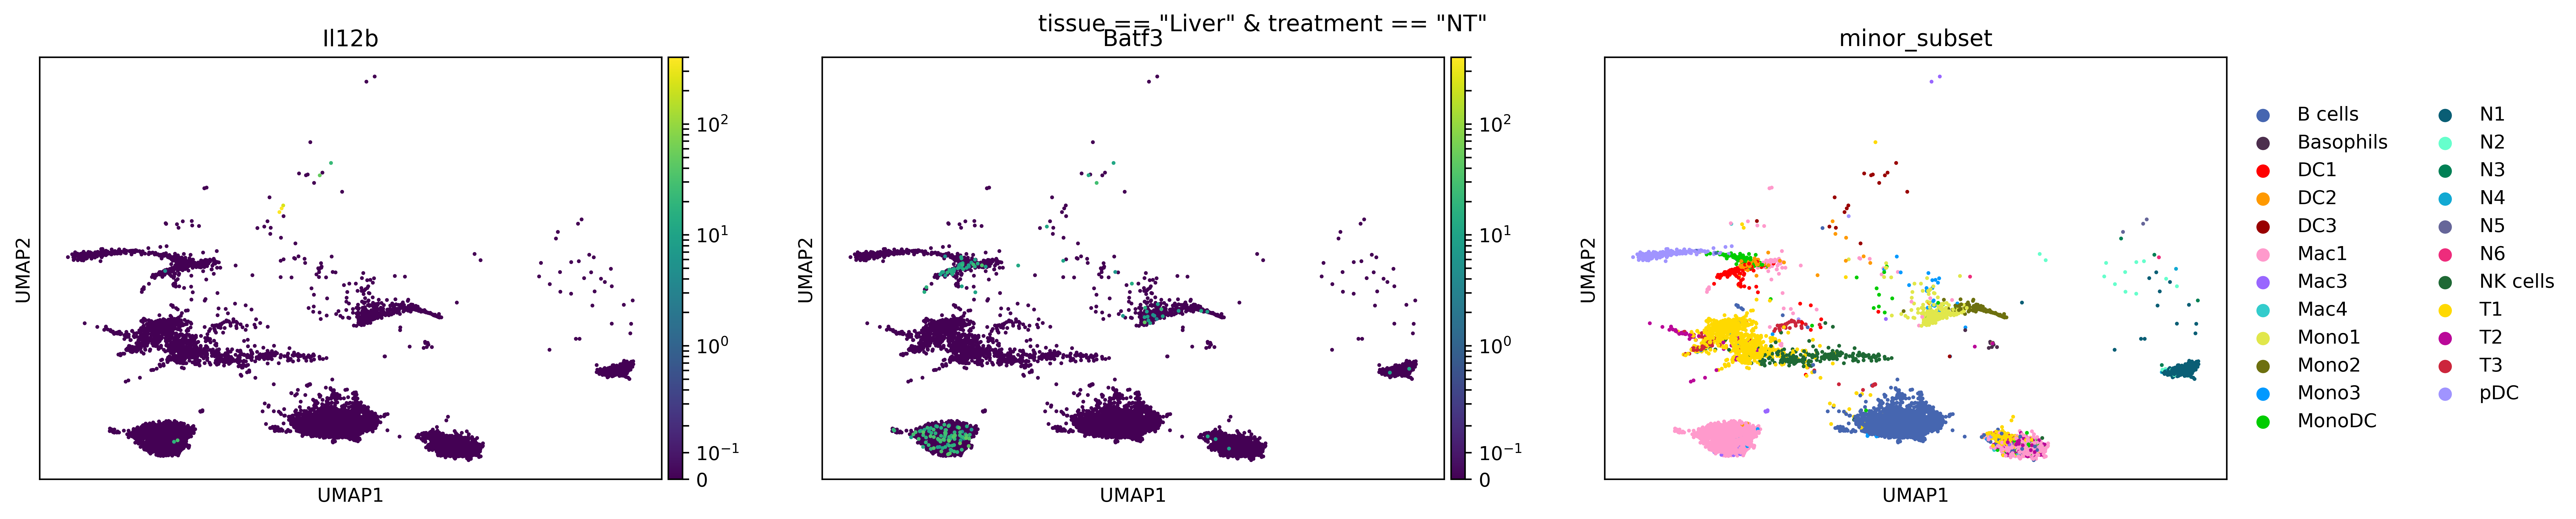

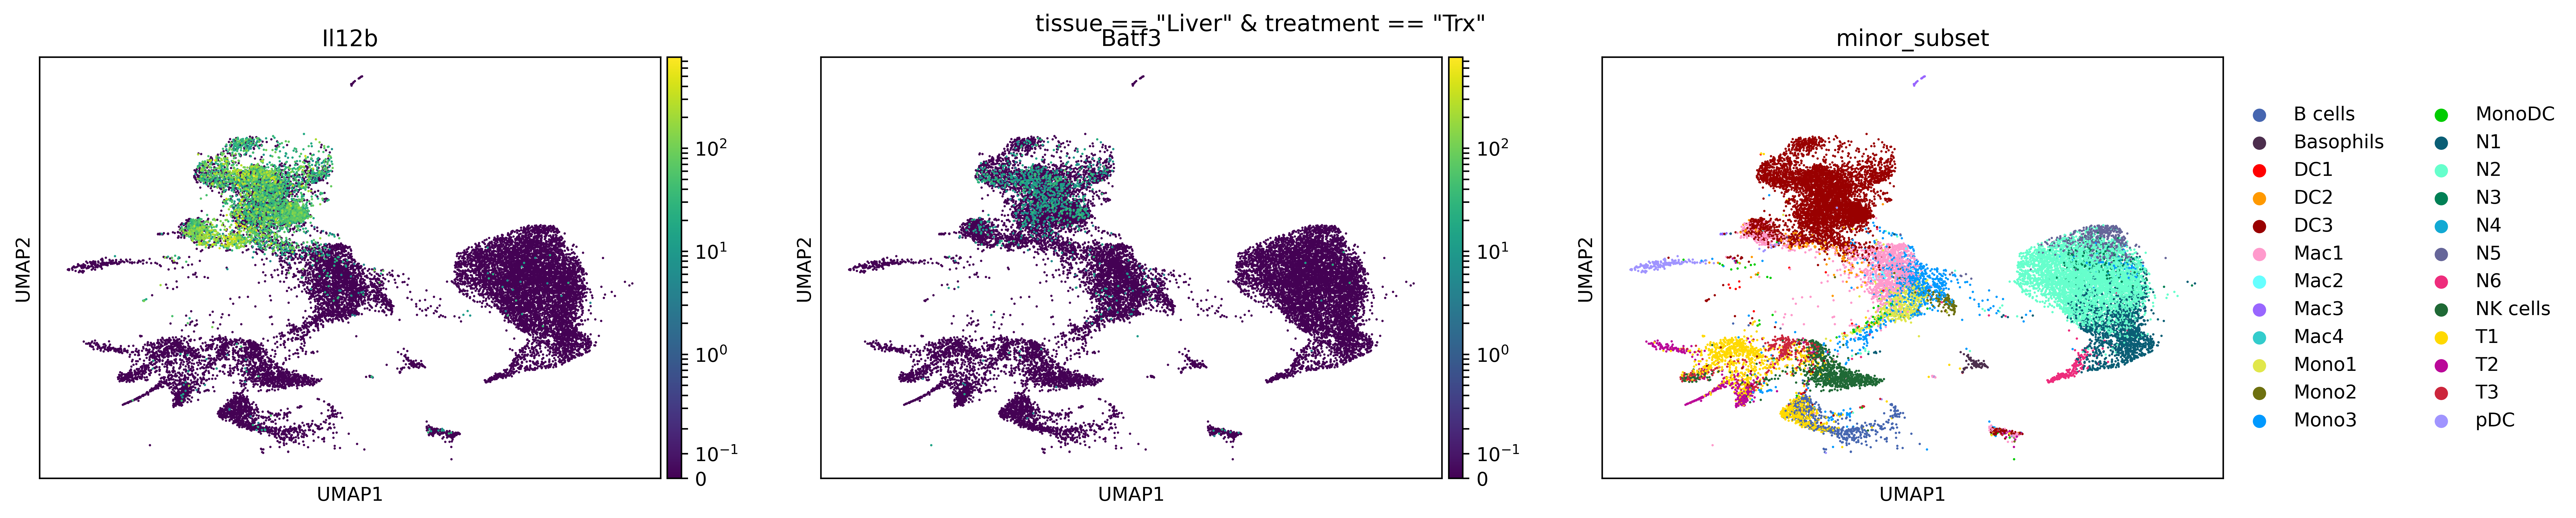

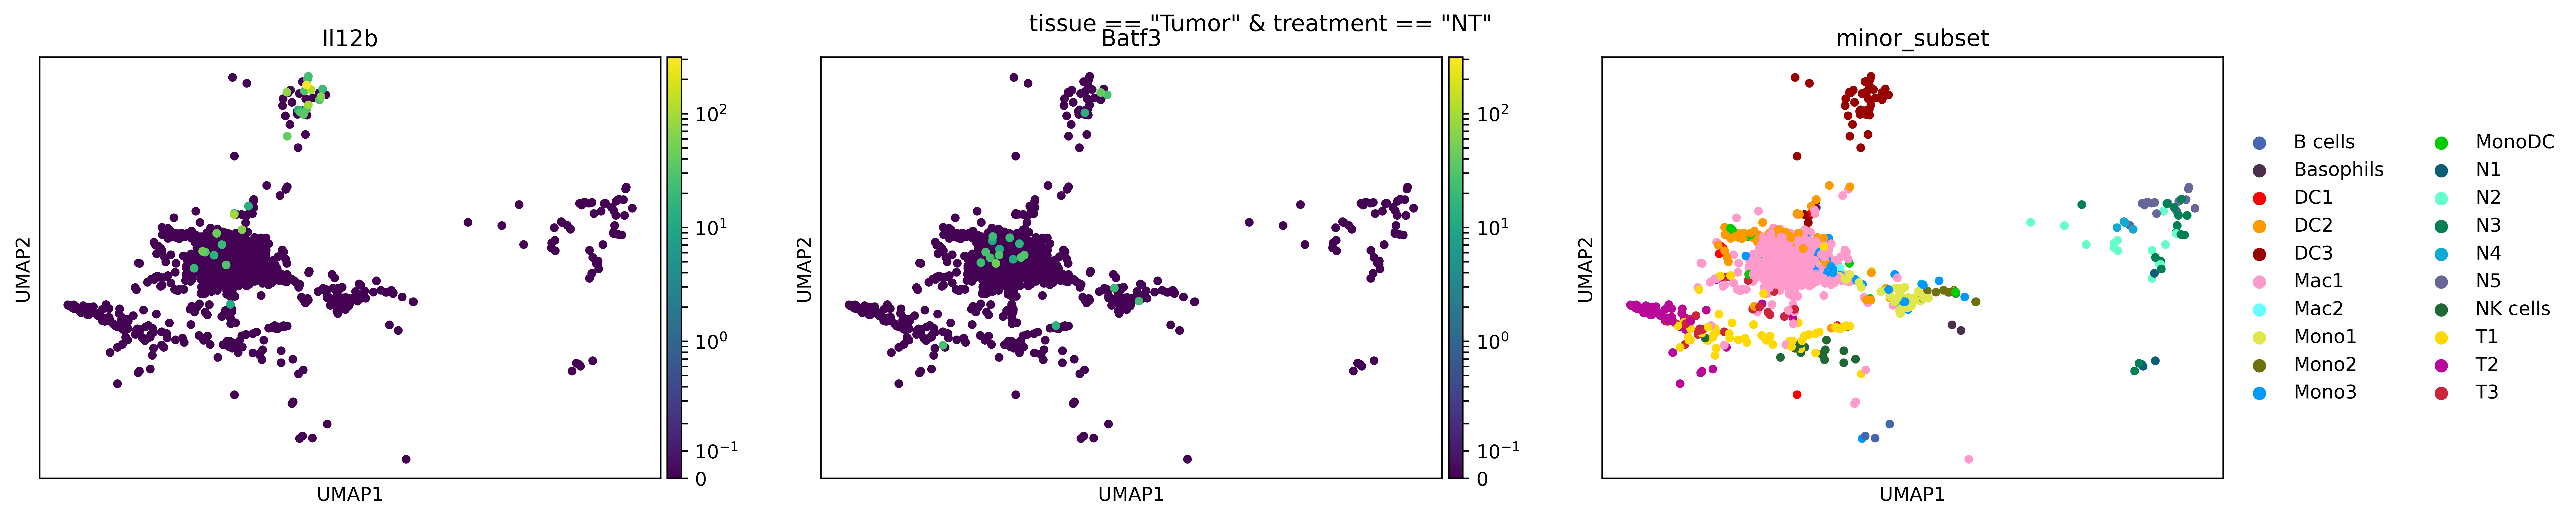

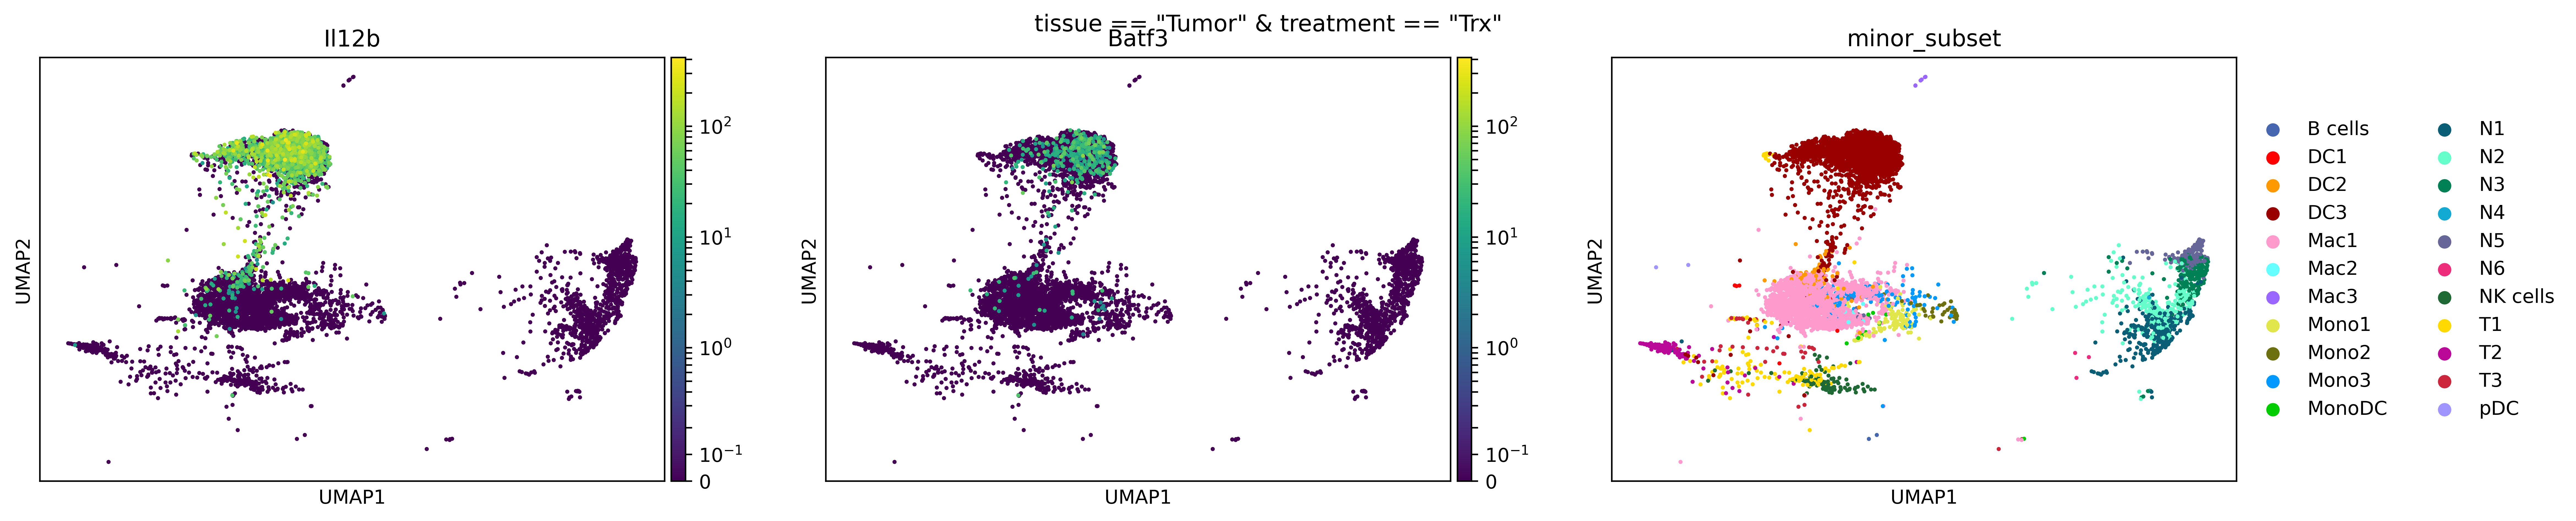

In [9]:
ng.umap_plot(adata_raw, split_by_cats = ['tissue','treatment'], color=['Il12b', 'Batf3', 'minor_subset'], folder='figures/batf_il12b', save_fig=False)

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


figures/treatment_NT_minor_subset_200409_17h32_1.pdf done!
figures/treatment_Trx_minor_subset_200409_17h32_2.pdf done!


[<Figure size 3000x2000 with 1 Axes>, <Figure size 3000x2000 with 1 Axes>]

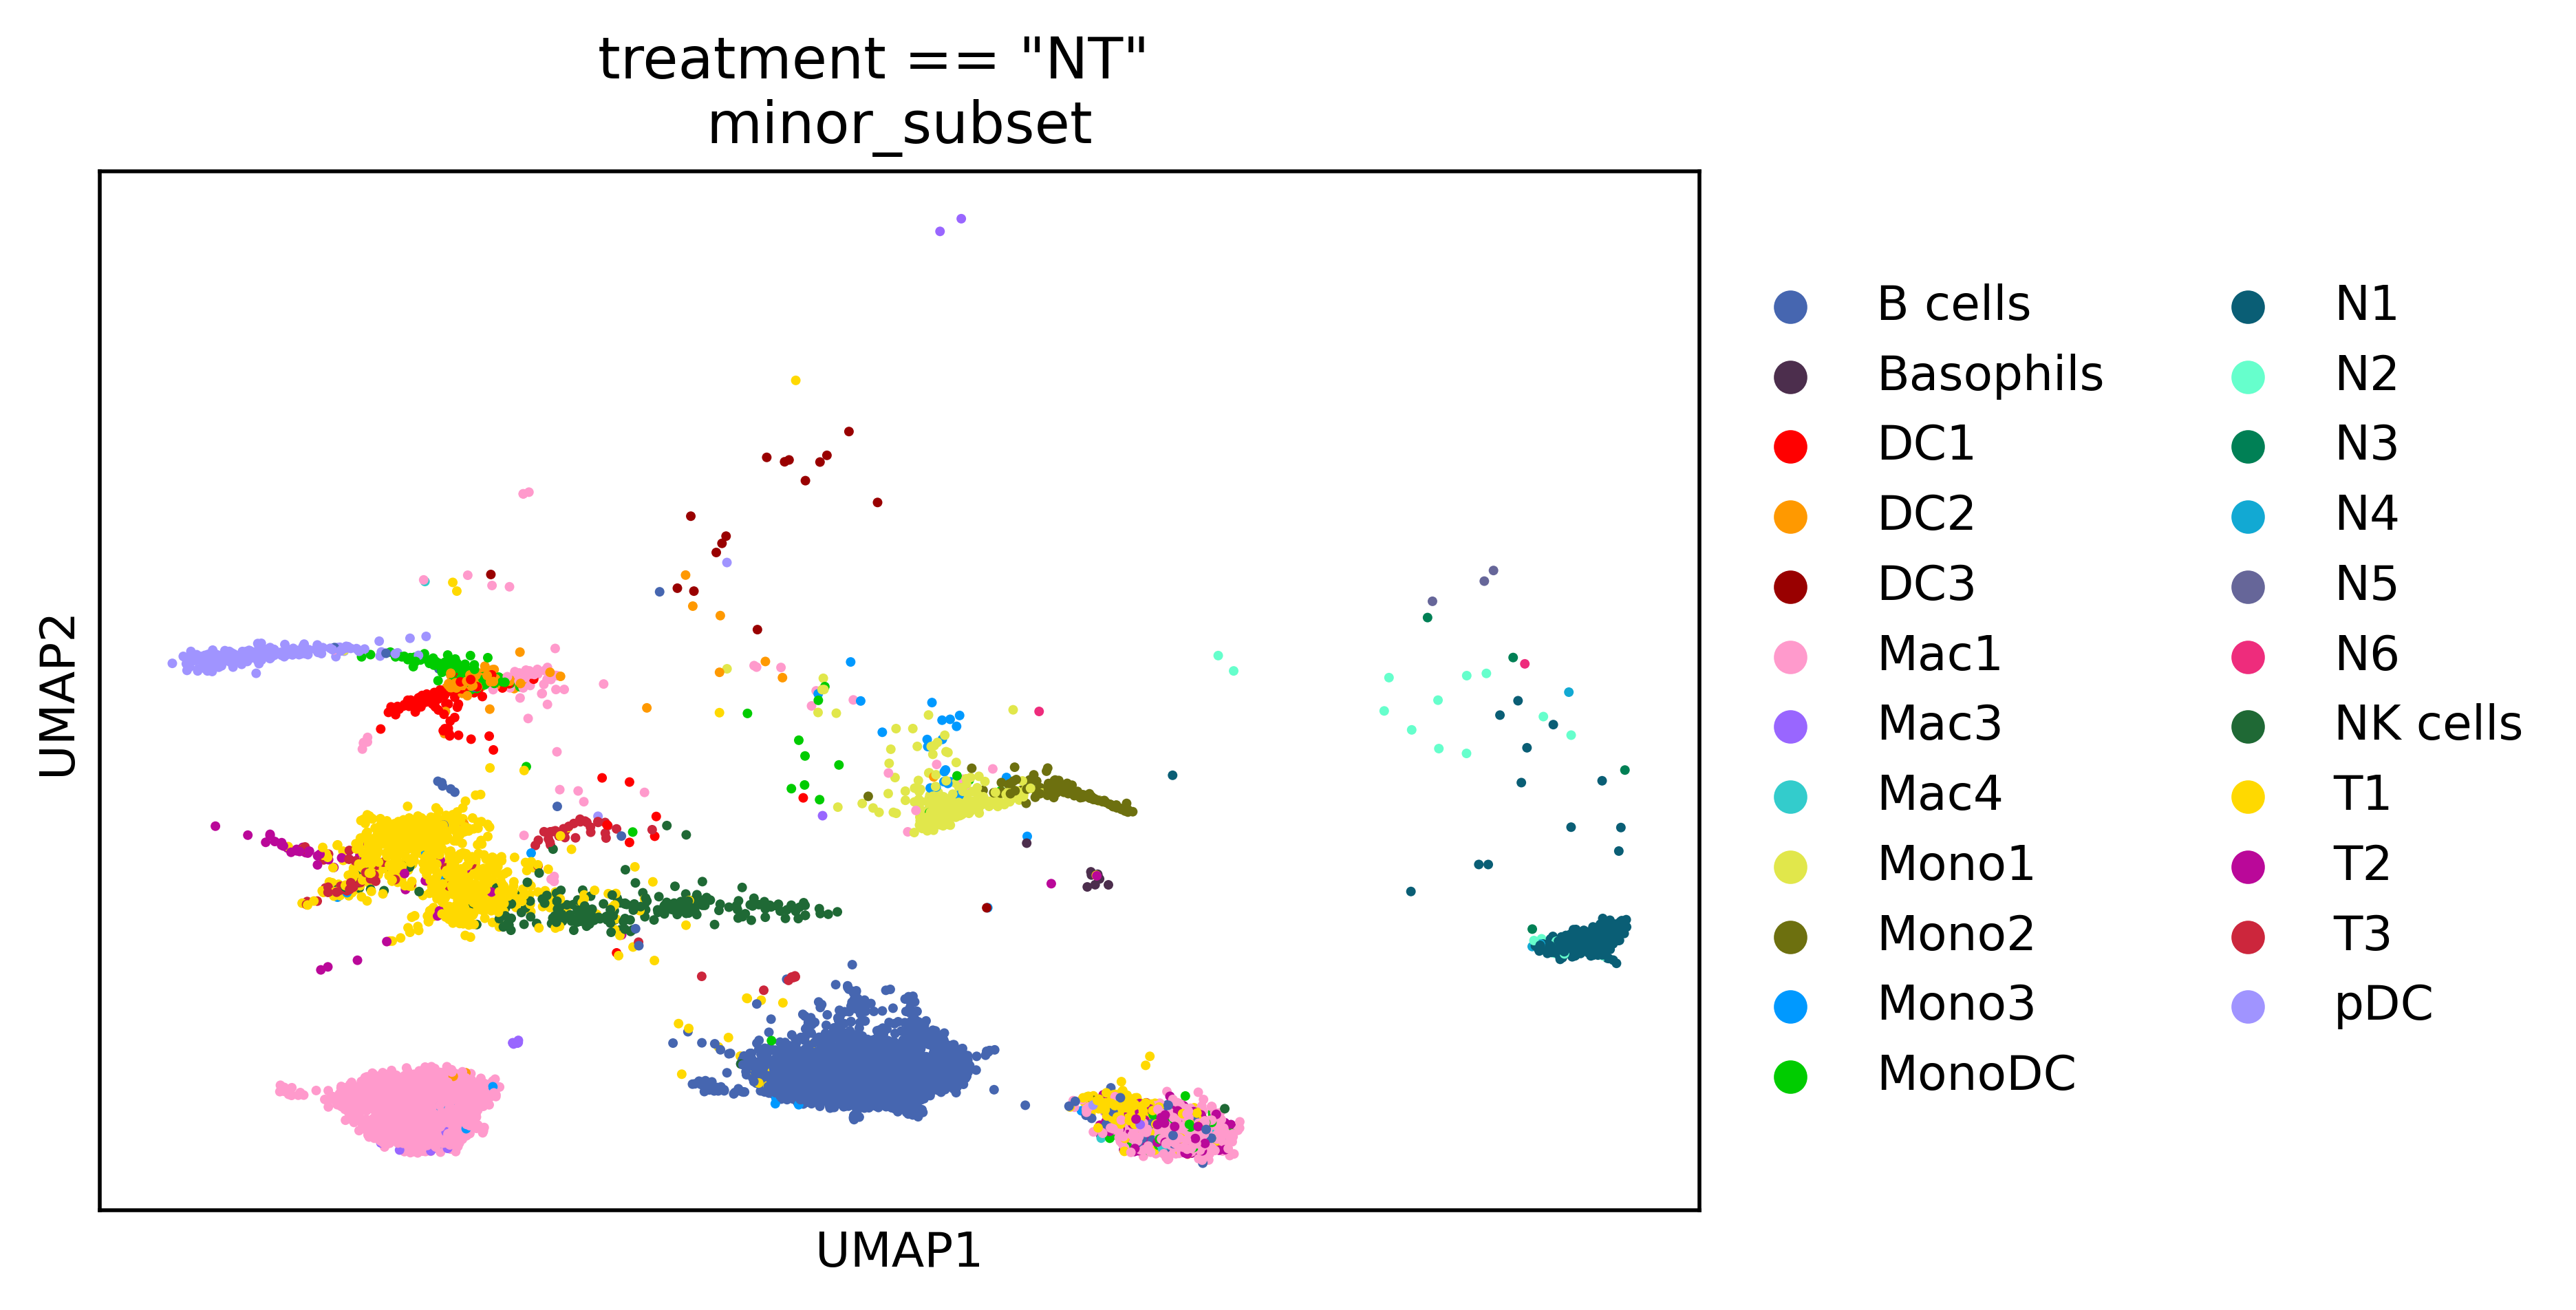

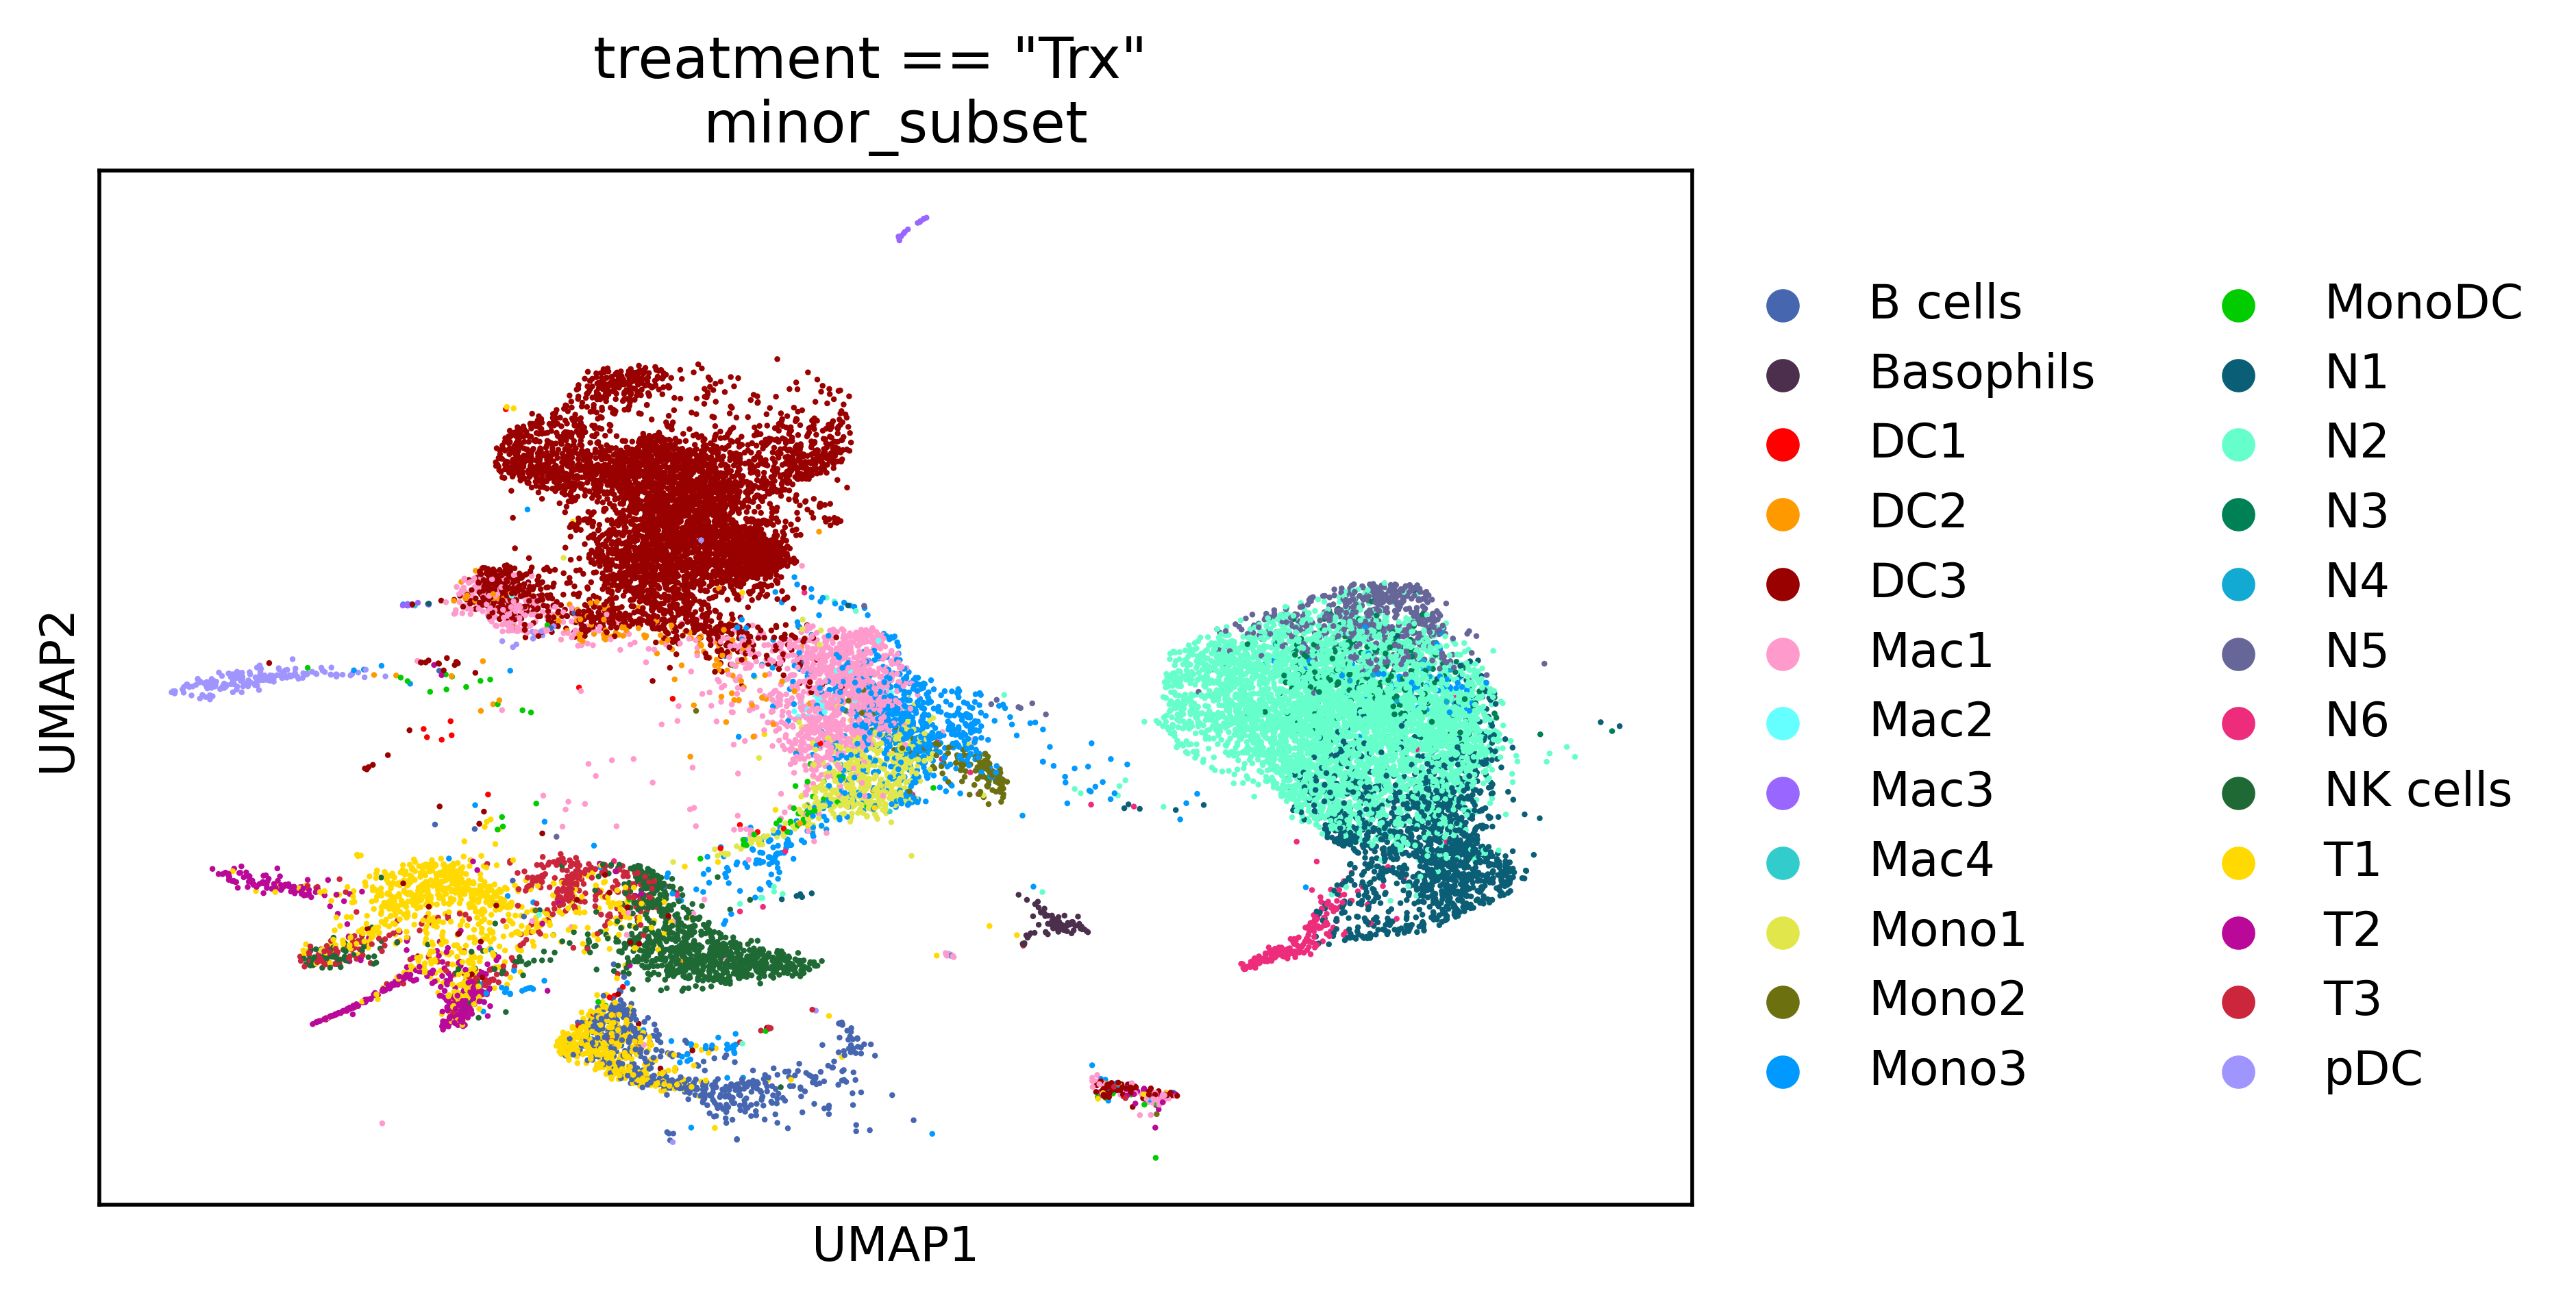

In [8]:

ng.umap_plot(adata_raw, filt='tissue == "Liver"', split_by_cats = 'library_name', color=['minor_subset, Il12b'])
        